# Postitional Encoding

**Why are positional encoding needed ?**  
The transformer model takes in an input, a sequence of vectors. During the attention mechanism, it loses the reletive positioning of these vectors in the sequence. In order to tag these vectors with their position, a positional encoding is attached to the vector to identify the relative positioning of the vector in the sequence

**What are the ways of doing this ?**
* *Using the $\sin$ and $\cos$ function to generate the embedding* : Uses some static precomputed embedding depending the sequence length. The i ranges from $[0, \frac{d}{2}]$ since two components, one from $\sin$ and the other from $\cos$ forms two dimension for each i value
    $$ 
    \begin{align}
        \text{PE}_{(\text{pos}, 2i)} &= \sin{(\frac{\text{pos}}{10000^{\frac{2i}{d}}})}  \\
        \text{PE}_{(\text{pos}, 2i+1)} &= \cos{(\frac{\text{pos}}{10000^{\frac{2i+1}{d}}})}
    \end{align}
    $$
  Frequency of the sinusodial function : $\frac{2\pi}{10000^{\frac{2i}{d}}}$
* *Learned positional embeddings* : Essentially learning the embedding during the training process.

**How to incorporate this back with the input vector**  
The embedding that is computed using one of the two above methods is of the same dimension, $d$ as the vector corresponding to each token. A simple addition is done with the vector representation of the token.

In [ ]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
d = 128
sequence_length = 16
# My positional embedding would be [sequence_length x d]

In [70]:
def plot_positional_embedding(arr, title=None):
    plt.figure(figsize=(20,2))
    ax = sns.heatmap(arr)
    ax.set(xticks = [], yticks = [], 
           xlabel = 'along d (i)', ylabel = 'along sequence (pos)',
           title = 'visual representation of the positional encoding'
          )
    plt.show()

In [71]:
positional_embeddings = []
for pos in range(sequence_length):
    embedding = []
    for i in range(d//2):
        sin_component = np.sin(pos/(10000**(2*i/d)))
        cos_component = np.cos(pos/(10000**((2*i+1)/d)))
        embedding = embedding + [sin_component, cos_component]
    positional_embeddings.append(embedding)

In [72]:
positional_embeddings = np.array(positional_embeddings)
positional_embeddings.shape

(16, 128)

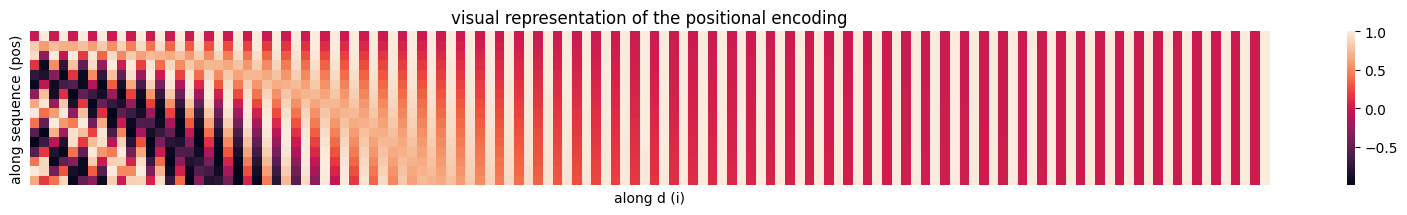

In [73]:
plot_positional_embedding(positional_embeddings)

Note that in the previous embedding, the $\sin$ and $\cos$ are alternated after each dimension such as 0 is $\sin$ then 1 is a value generated from $\cos$.  
In reality we end up just appending the sin and cos after $\frac{d}{2}$ dimensions like shown below

In [74]:
i = np.arange(0,d//2)
positional_embedding = []
for pos in range(sequence_length):
    positional_embedding.append(
              np.concatenate([np.sin(pos/(10000**((2*i)/d))), 
                              np.cos(pos/(10000**((2*i+1)/d)))]))

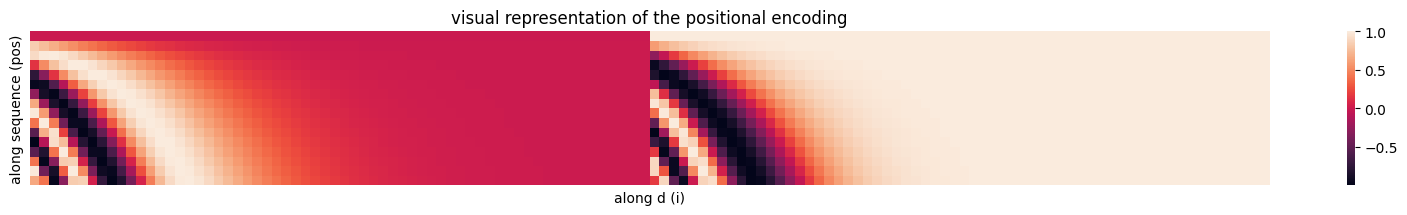

In [75]:
plot_positional_embedding(positional_embedding)